In [5]:
#%% Importing Required Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import NeighborhoodComponentsAnalysis,LocalOutlierFactor
from sklearn.decomposition import PCA
from knn_classifier import Knn_Classifier
from visualization_helper import visualization_helper
import pickle

from input_data import input_data
#warnings
import warnings
warnings.filterwarnings("ignore")

data_df=pd.read_csv("data.csv")
data_df.drop(["Unnamed: 32",'id'],inplace=True,axis=1)

data_df=data_df.rename(columns={"diagnosis":"target","concave points_worst":"concave_points_worst","concave points_mean":"concave_points_mean",
                                "concave points_se":"concave_points_se"
                                
                                })



target
B    357
M    212
Name: count, dtype: int64


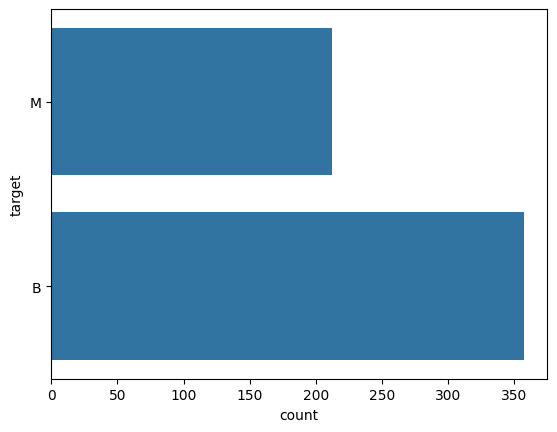

In [6]:
sns.countplot(data_df["target"])
print(data_df.target.value_counts())



In [7]:
data_df["target"]=[1 if i.strip()=="M" else 0 for i in data_df.target]

print(len(data_df))
print(f"Data shape: {data_df.shape}")

data_df.info()

description=data_df.describe()

example=data_df.iloc[539,:]
example.to_json()


569
Data shape: (569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  

'{"target":0.0,"radius_mean":7.691,"texture_mean":25.44,"perimeter_mean":48.34,"area_mean":170.4,"smoothness_mean":0.08668,"compactness_mean":0.1199,"concavity_mean":0.09252,"concave_points_mean":0.01364,"symmetry_mean":0.2037,"fractal_dimension_mean":0.07751,"radius_se":0.2196,"texture_se":1.479,"perimeter_se":1.445,"area_se":11.73,"smoothness_se":0.01547,"compactness_se":0.06457,"concavity_se":0.09252,"concave_points_se":0.01364,"symmetry_se":0.02105,"fractal_dimension_se":0.007551,"radius_worst":8.678,"texture_worst":31.89,"perimeter_worst":54.49,"area_worst":223.6,"smoothness_worst":0.1596,"compactness_worst":0.3064,"concavity_worst":0.3393,"concave_points_worst":0.05,"symmetry_worst":0.279,"fractal_dimension_worst":0.1066}'

In [23]:
print(data_df.iloc[28]["target"])
print(data_df.iloc[28]["radius_worst"])
print(data_df.iloc[28]["perimeter_worst"])
print(data_df.iloc[28]["area_worst"])
print(data_df.iloc[28]["perimeter_mean"])
print(data_df.iloc[28]["radius_mean"])
print(data_df.iloc[28]["area_mean"])
print(data_df.iloc[28]["concavity_worst"])
print(data_df.iloc[28]["concavity_mean"])
print(data_df.iloc[28]["concave_points_mean"])
print(data_df.iloc[28]["concave_points_worst"])

1.0
20.27
149.3
1269.0
102.4
15.3
732.4
0.6335
0.1683
0.08751
0.2024


## Exploratory Data Analysis

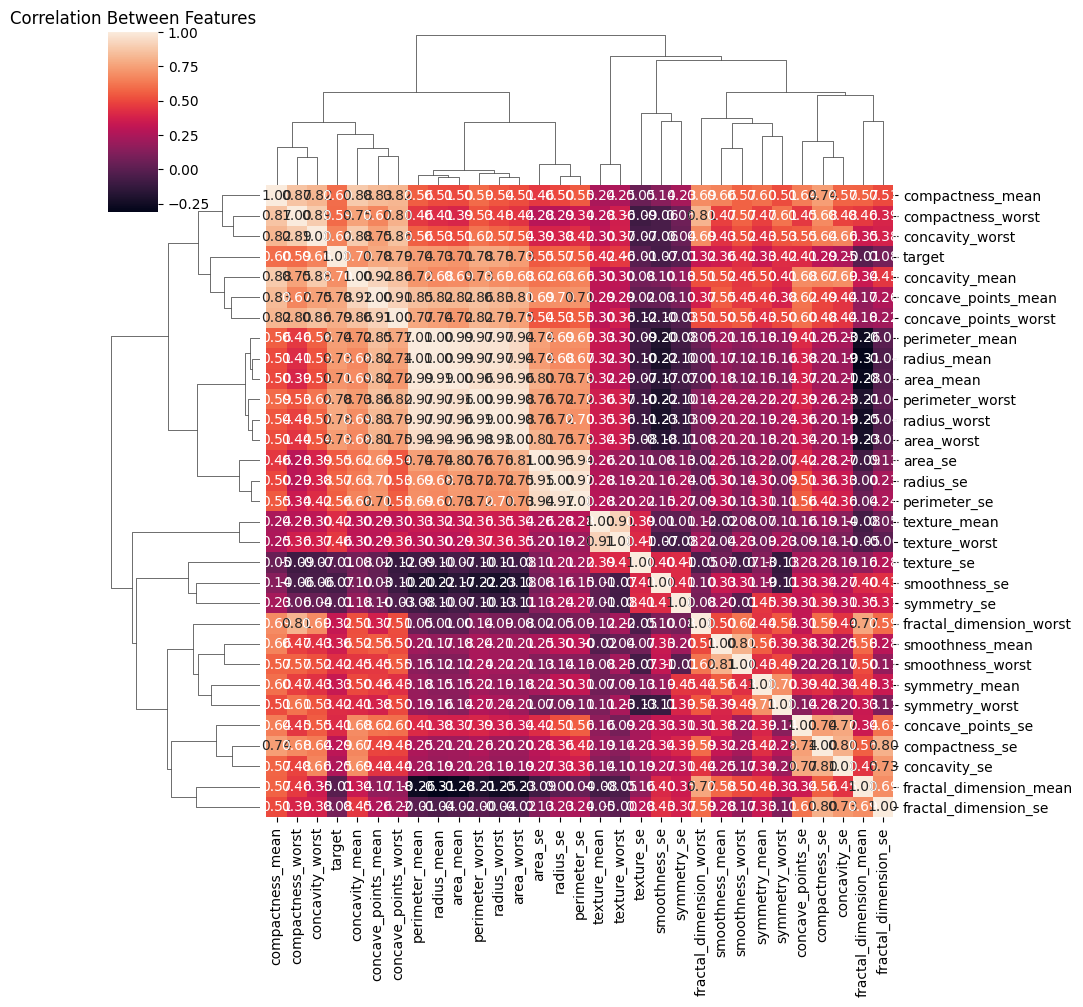

In [4]:
corr_matrix=data_df.corr()
sns.clustermap(corr_matrix, annot=True,fmt=".2f")

plt.title("Correlation Between Features")
plt.show()



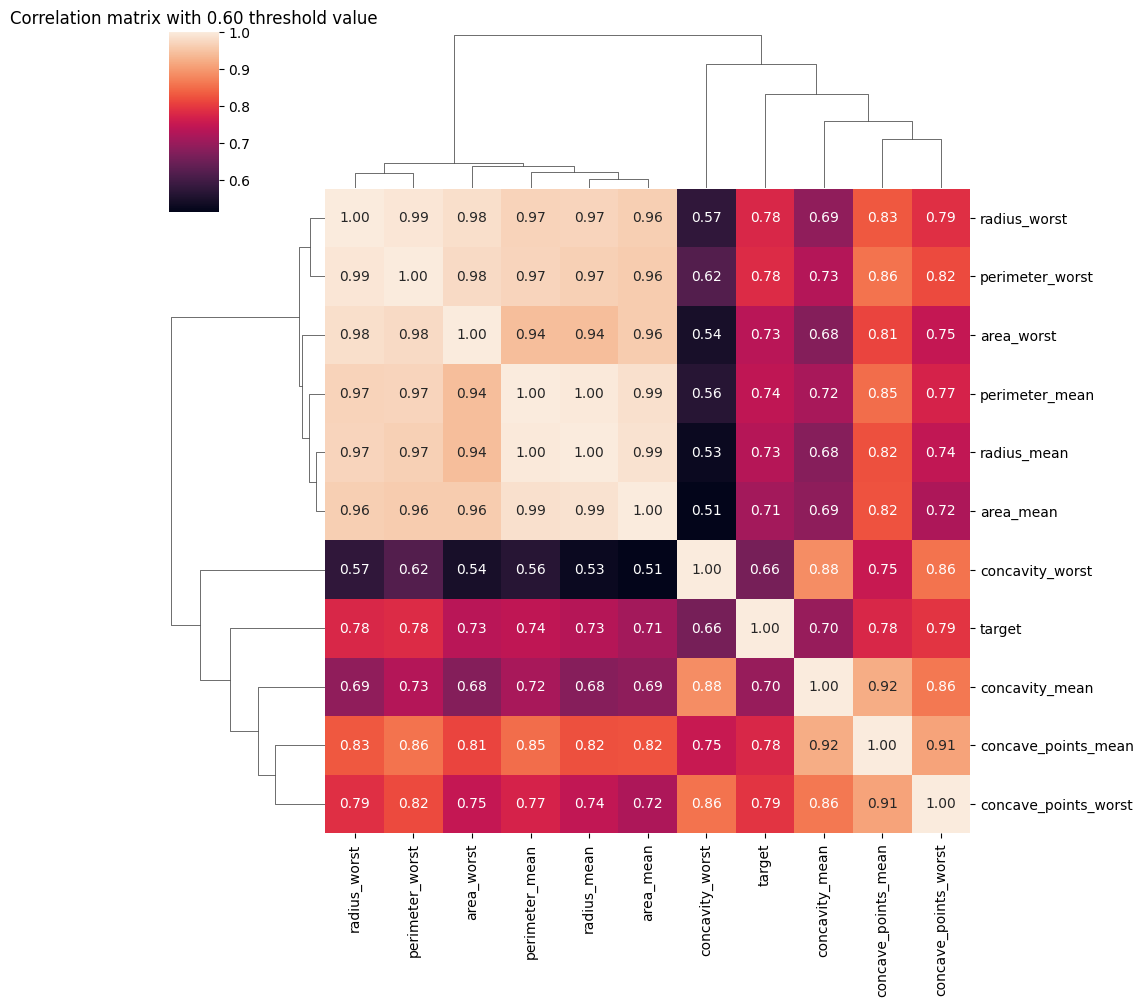

In [5]:
threshold=0.60
filter=np.abs(corr_matrix["target"])>threshold
corr_features=corr_matrix.columns[filter].tolist()

sns.clustermap(data_df[corr_features].corr(), annot=True, fmt=".2f")
plt.title("Correlation matrix with 0.60 threshold value")
plt.show()

In [20]:
new_cols=["target","radius_worst","perimeter_worst","area_worst","perimeter_mean","radius_mean","area_mean","concavity_worst","concavity_mean","concave_points_mean","concave_points_worst"]

data_df_engineered=data_df[new_cols]

In [21]:
data_df_engineered[data_df_engineered["target"]==1]

,target,radius_worst,perimeter_worst,area_worst,perimeter_mean,radius_mean,area_mean,concavity_worst,concavity_mean,concave_points_mean,concave_points_worst
0,1,25.38,184.60,2019.0,122.80,17.99,1001.0,0.7119,0.30010,0.14710,0.2654
1,1,24.99,158.80,1956.0,132.90,20.57,1326.0,0.2416,0.08690,0.07017,0.1860
2,1,23.57,152.50,1709.0,130.00,19.69,1203.0,0.4504,0.19740,0.12790,0.2430
3,1,14.91,98.87,567.7,77.58,11.42,386.1,0.6869,0.24140,0.10520,0.2575
4,1,22.54,152.20,1575.0,135.10,20.29,1297.0,0.4000,0.19800,0.10430,0.1625
...,...,...,...,...,...,...,...,...,...,...,...
563,1,24.29,179.10,1819.0,143.00,20.92,1347.0,0.6599,0.31740,0.14740,0.2542
564,1,25.45,166.10,2027.0,142.00,21.56,1479.0,0.4107,0.24390,0.13890,0.2216
565,1,23.69,155.00,1731.0,131.20,20.13,1261.0,0.3215,0.14400,0.09791,0.1628
566,1,18.98,126.70,1124.0,108.30,16.60,858.1,0.3403,0.09251,0.05302,0.1418


In [22]:
data_df_engineered[data_df_engineered["target"]==0]

,target,radius_worst,perimeter_worst,area_worst,perimeter_mean,radius_mean,area_mean,concavity_worst,concavity_mean,concave_points_mean,concave_points_worst
19,0,15.110,99.70,711.2,87.46,13.540,566.3,0.23900,0.06664,0.047810,0.12880
20,0,14.500,96.09,630.5,85.63,13.080,520.0,0.18900,0.04568,0.031100,0.07283
21,0,10.230,65.13,314.9,60.34,9.504,273.9,0.08867,0.02956,0.020760,0.06227
37,0,13.300,84.46,545.9,82.61,13.030,523.8,0.04833,0.02562,0.029230,0.05013
46,0,8.964,57.26,242.2,51.71,8.196,201.9,0.06880,0.01588,0.005917,0.02564
...,...,...,...,...,...,...,...,...,...,...,...
558,0,15.480,105.90,733.5,96.39,14.590,657.1,0.36620,0.10290,0.037360,0.11050
559,0,12.480,82.28,474.2,74.52,11.510,403.5,0.36300,0.11120,0.041050,0.09653
560,0,15.300,100.20,706.7,91.38,14.050,600.4,0.13260,0.04462,0.043040,0.10480
561,0,11.920,75.19,439.6,70.67,11.200,386.0,0.00000,0.00000,0.000000,0.00000


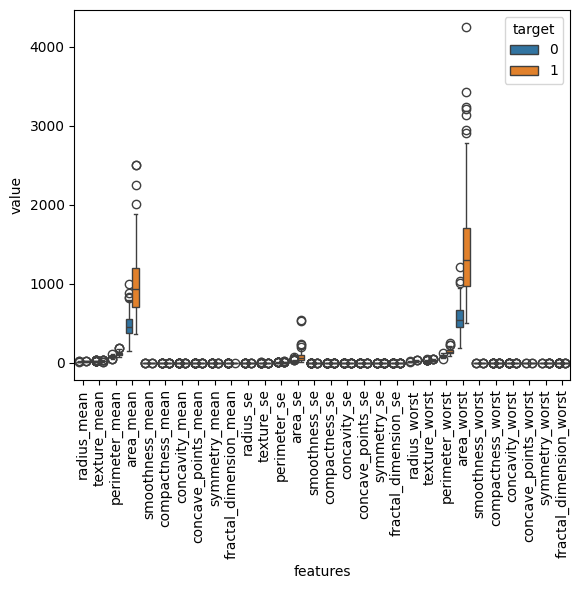

'\nsns.pairplot(data_df[corr_features],diag_kind="kde",markers="+",hue="target")\nplt.show()\n'

In [9]:
##Box Plot

data_melted=pd.melt(data_df,id_vars="target",var_name="features",value_name="value")
sns.boxplot(x="features", y="value",hue="target",data=data_melted)

plt.xticks(rotation=90)
plt.show()

"""
sns.pairplot(data_df[corr_features],diag_kind="kde",markers="+",hue="target")
plt.show()
"""

## Outlier Detection

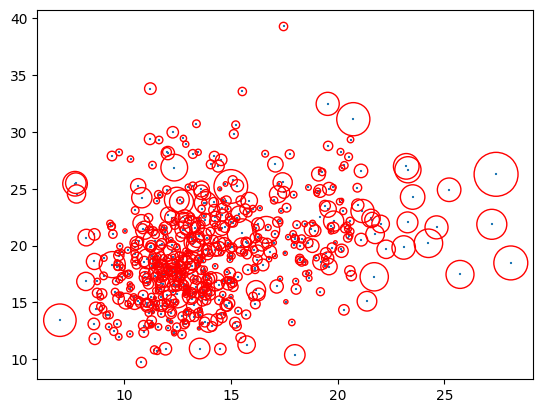

In [12]:
# %% Outlier Detection

y=data_df["target"]
X=data_df.drop(["target"],axis=1)
columns=data_df.columns.tolist()

clf=LocalOutlierFactor()#Finds outliers

#LOF>1:Outlier
#LOF<1:Inlier

y_pred=clf.fit_predict(X)

#In y_pred matris if value equals to 1 inlier else outlier

X_score=clf.negative_outlier_factor_

outlier_score=pd.DataFrame()
outlier_score["score"]=X_score

threshold=-2.5
filter=outlier_score["score"]<threshold

radius=(X_score.max()-X_score)/(X_score.max()-X_score.min())
outlier_score["radius"]=radius


plt.figure()
plt.scatter(X.iloc[:,0],X.iloc[:,1],s=3,marker=("+"))



plt.scatter(X.iloc[:,0],X.iloc[:,1],s=1000*radius,edgecolors="r",facecolors="none",label="Outlier scores")
plt.show()


## Train-Test Splitting

<class 'pandas.core.frame.DataFrame'>


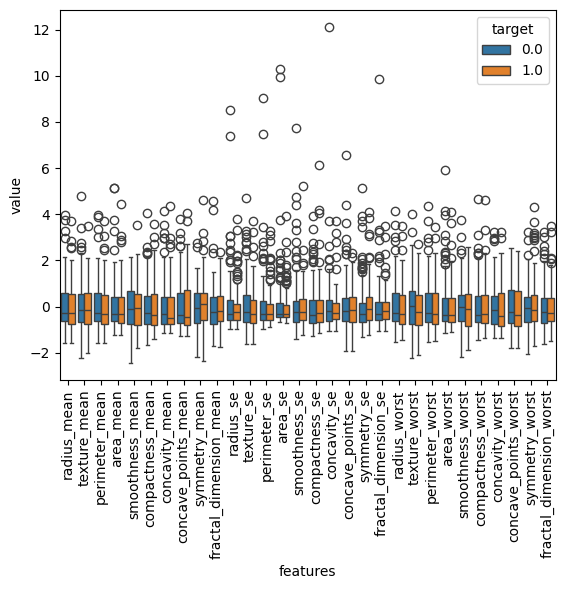

In [13]:
#%%Train-test-splitting

test_size=0.3
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size,random_state=42)

print(type(X_train))


X_train_description=X_train.describe()
X_train_description_df=pd.DataFrame(X_train_description)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

columns.pop(0)
##X_train ayır ve boxplot ile göster...
X_train_df=pd.DataFrame(X_train_scaled,columns=columns)
X_train_df_describe=X_train_df.describe()

X_train_df["target"]=y_train


data_melted=pd.melt(X_train_df,id_vars="target",var_name="features",value_name="value")

plt.figure()
sns.boxplot(x="features",y="value",data=data_melted,hue="target")
plt.xticks(rotation=90)
plt.show()


In [14]:
#%% KNN Algorithm
#Sensitive to outliers
#Easy to implement 
#Fast
#Curse of dimensionality
#Need to feature scaling

knn=Knn_Classifier(n_neighbors=2, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
train_acc,test_acc,knn_model=knn.get_scores_with_best_params()
model=knn_model
pickle.dump(model, open("knn.sav","wb"))




Best training score 0.9169303797468353 with parameters : {'n_neighbors': 13, 'weights': 'distance'}
Train acc with best params :1.0 
 Test acc with best params 0.9766081871345029


## PCA (Principal Component Analysis)

0.9532163742690059
0.949748743718593


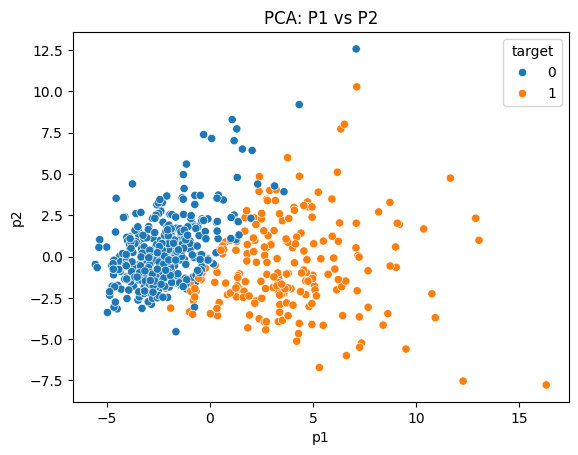

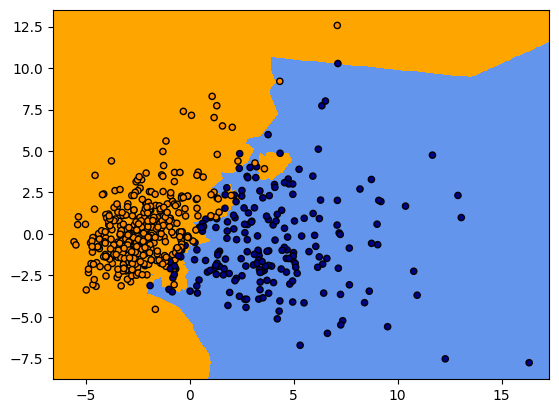

In [15]:
#%% Principal Component Analysis

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

pca=PCA(n_components=2)
pca.fit(X_scaled)

X_reduced_pca=pca.transform(X_scaled)
pca_data=pd.DataFrame(X_reduced_pca,columns=["p1","p2"])
pca_data["target"]=y

sns.scatterplot(x="p1",y="p2",hue="target",data=pca_data)
plt.title("PCA: P1 vs P2")

X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(X_reduced_pca,y,test_size=0.3,random_state=42)

model=KNeighborsClassifier(n_neighbors=2)
model.fit(X_train_pca, y_train_pca)
vh=visualization_helper(model=model, y=y)
vh.visualize_pca(X_reduced_pca, 0.05)

preds_test=model.predict(X_test_pca)
print(accuracy_score(y_test_pca, preds_test))#0.95 test accuracy score

preds_train=model.predict(X_train_pca)
print(accuracy_score(y_train_pca, preds_train))#0.94 test accuracy score


## NCA(NeighbourHood Component Analysis)

0.9883040935672515
0.9899497487437185


0

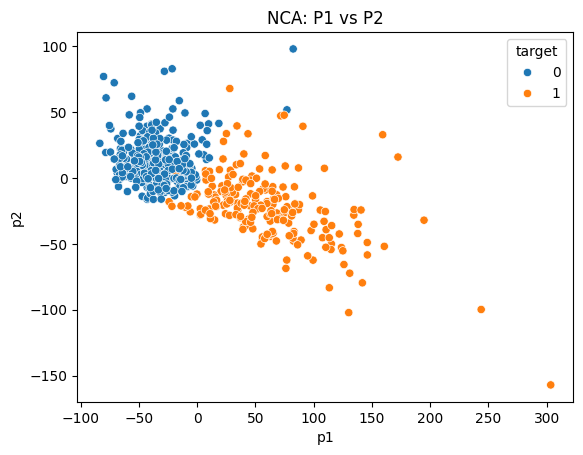

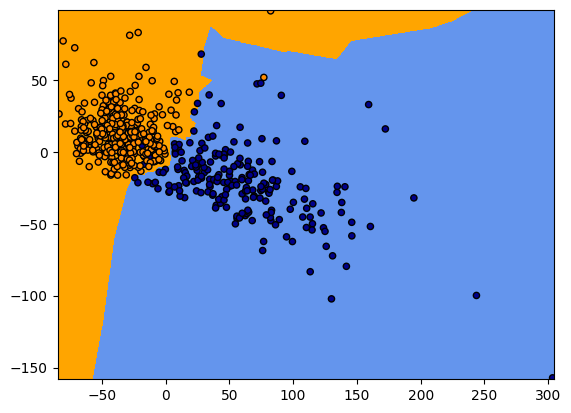

In [16]:

#%%Neighborhood Component Analysis

nca=NeighborhoodComponentsAnalysis(n_components=2)
nca.fit(X_scaled, y)
X_reduced_nca=nca.transform(X_scaled)
nca_data=pd.DataFrame(X_reduced_nca,columns=["p1","p2"])
nca_data["target"]=y

nca.transform(X_scaled[0].reshape(1,-1))

sns.scatterplot(x="p1",y="p2",hue="target", data=nca_data)
plt.title("NCA: P1 vs P2")

X_train_nca,X_test_nca,y_train_nca,y_test_nca=train_test_split(X_reduced_nca,y,test_size=0.3,random_state=42)

model=KNeighborsClassifier(n_neighbors=2)
model.fit(X_train_nca, y_train_nca)
vh=visualization_helper(model=model, y=y)
vh.visualize_pca(X_reduced_nca, 0.2)

preds_test=model.predict(X_test_nca)
print(accuracy_score(y_test_nca, preds_test))#0.98 test accuracy score

preds_train=model.predict(X_train_nca)
print(accuracy_score(y_train_nca, preds_train))#0.98 test accuracy score

X_test_nca[0]
preds_test[0]